# Calorie Predictor Project
This project focuses on predicting the  number of calories burned using various physical activities such as `Age`,`Height`,`Weight`,`Heart Rate` and more. The goal is to build a predictive model using **Linear Regression** while also gaining insights through data visualization and analysis.
Below are the steps followed in this project:
- Import necessary Libraries
- Load and Preprocess the dataset
- Perform Exploratory Data Analysis (EDA)
- Feature Engineering
- Train the Linear Regression Model
- Evaluate Model Performance
  
**Author:** Bimal Kumal


## Import necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and preprocess the dataset 

In [135]:
data=pd.read_csv("/Users/bimalkumal/Desktop/Machine Learning Resources/calories.csv")

In [137]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [139]:
data.shape

(15000, 9)

In [ ]:
# Drop the unnecessary feature

In [143]:
data=data.drop(columns="User_ID")

In [145]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])  # male=1 & Female=0

In [149]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [151]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Feature Engineering

In [153]:
data["Height"] = data["Height"] / 100 # converting the height into meter
data["BMI"] = data["Weight"] / (data["Height"] ** 2)  

In [155]:
data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,1,68,1.90,94.0,29.0,105.0,40.8,231.0,26.038781
1,0,20,1.66,60.0,14.0,94.0,40.3,66.0,21.773842
2,1,69,1.79,79.0,5.0,88.0,38.7,26.0,24.655910
3,0,34,1.79,71.0,13.0,100.0,40.5,71.0,22.159109
4,0,27,1.54,58.0,10.0,81.0,39.8,35.0,24.456063


## Exploratory Data Analysis(EDA)

In [175]:
data.describe()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.496467,42.789800,1.744651,74.966867,15.530600,95.518533,40.025453,89.539533,24.344900
std,0.500004,16.980264,0.142581,15.035657,8.319203,9.583328,0.779230,62.456978,1.558784
min,0.000000,20.000000,1.230000,36.000000,1.000000,67.000000,37.100000,1.000000,19.227688
25%,0.000000,28.000000,1.640000,63.000000,8.000000,88.000000,39.600000,35.000000,23.243408
50%,0.000000,39.000000,1.750000,74.000000,16.000000,96.000000,40.200000,79.000000,24.376731
75%,1.000000,56.000000,1.850000,87.000000,23.000000,103.000000,40.600000,138.000000,25.492722
max,1.000000,79.000000,2.220000,132.000000,30.000000,128.000000,41.500000,314.000000,29.069767


In [161]:
data.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357,0.662327
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395,0.255609
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537,0.477897
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481,0.700217
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421,0.006042
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882,0.011792
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558,0.010827
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000,0.056473
BMI,0.662327,0.255609,0.477897,0.700217,0.006042,0.011792,0.010827,0.056473,1.000000


In [163]:
correlation=data.corr()

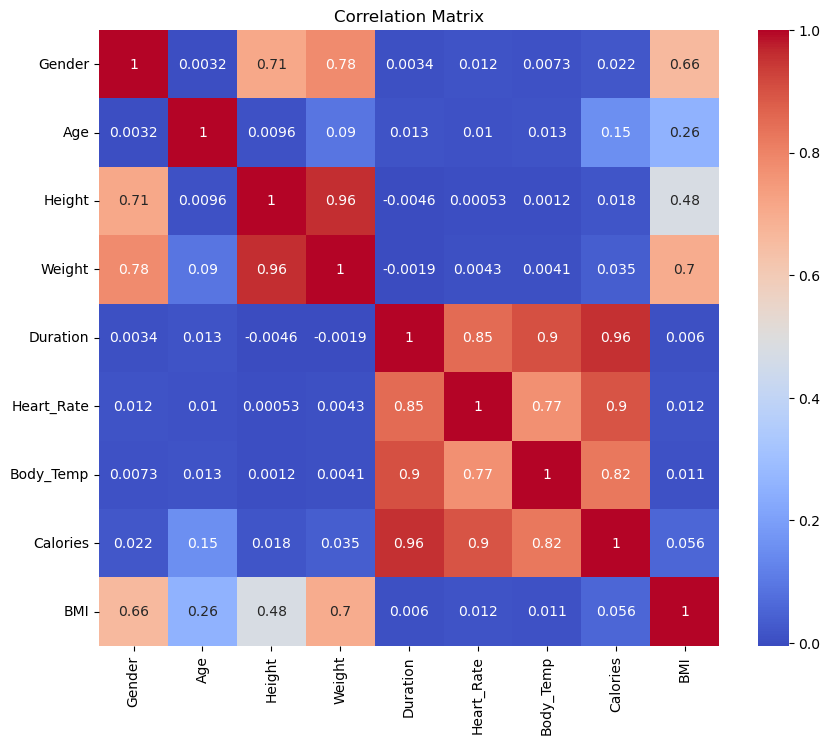

In [165]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

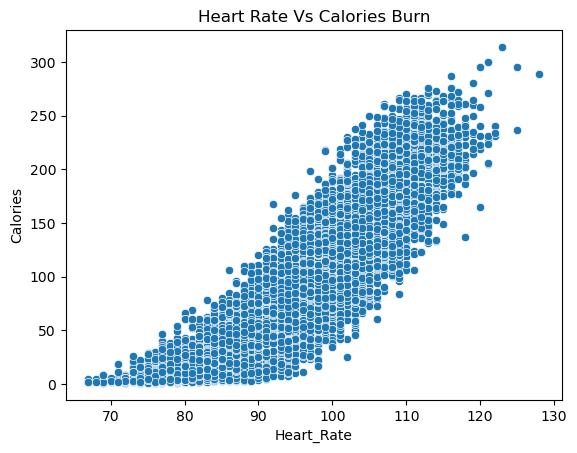

In [167]:
sns.scatterplot(data=data,x="Heart_Rate",y="Calories")
plt.title("Heart Rate Vs Calories Burn")
plt.show()

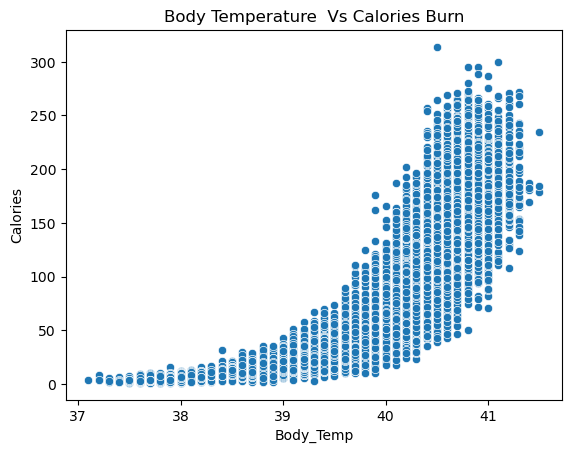

In [169]:
sns.scatterplot(data=data,x="Body_Temp",y="Calories")
plt.title("Body Temperature  Vs Calories Burn")
plt.show()

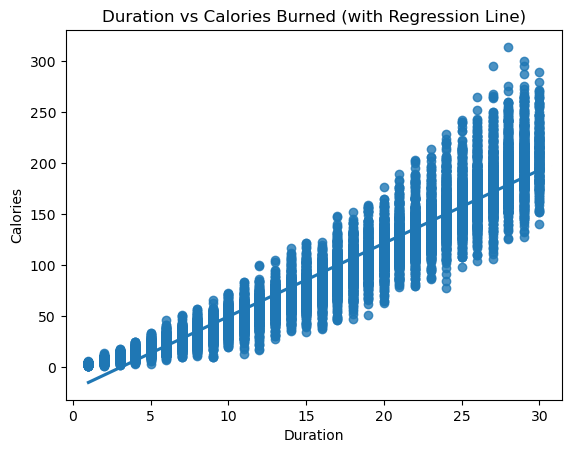

In [171]:
sns.regplot(data=data, x='Duration', y='Calories')
plt.title("Duration vs Calories Burned (with Regression Line)")
plt.show()


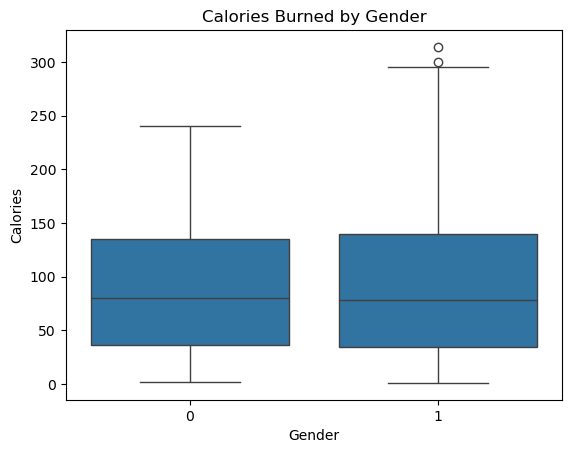

In [173]:
sns.boxplot(data=data, x='Gender', y='Calories')
plt.title("Calories Burned by Gender")
plt.show()
# male =1 & Female=0

## Train the Linear Regression Model
**Split the Dataset**

Divide the dataset into `features(X)` and `Target(Y)`variables, and then split it into training and testing sets to evaluate the model's performance.

In [101]:
from sklearn.model_selection import train_test_split
X=data.drop(columns="Calories")
Y=data["Calories"]


In [103]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [105]:
X_train.shape

(12000, 8)

In [107]:
x_test.shape

(3000, 8)

## Train the Model
After splitting, use the training data to fit the Linear Regression model.

In [109]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [111]:
y_pred=model.predict(x_test)

## Evaluate Model Performance
Evaluate the performance of the model using the testing data.

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Square Error:", mean_squared_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

Mean Absolute Error: 8.029666323257004
Mean Square Error: 121.65957799462333
R2 Score : 0.9690796363371069


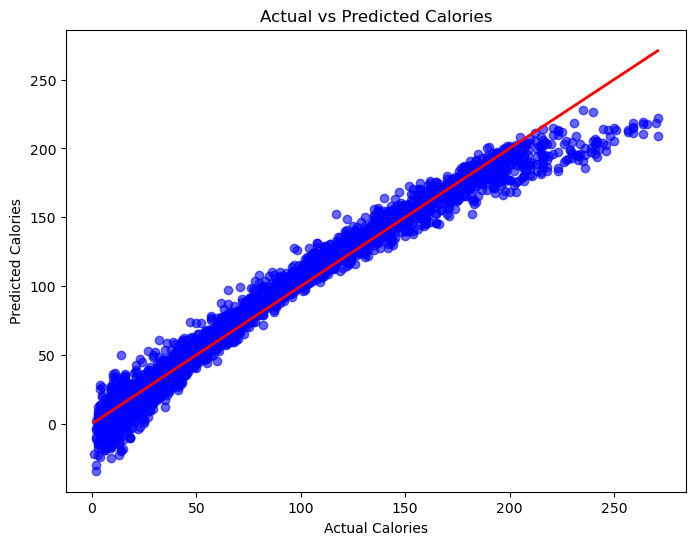

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Calories")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.show()


## Conclusion
This project successfully analyzed the dataset and built a predictive model to estimate the number of calories burned based on various physical attributes and activity data. Key points include:
- The dataset was clean, and features like BMI and encoded Gender were added.
- A Linear Regression model was trained and evaluated using a train-test split.
- The model performed well, showing accurate predictions for calorie burn.

This project highlights the power of machine learning in solving real-world problems such as calorie prediction. The analysis and predictions can be extended further by:
- Incorporating additional features like physical activity type, step count, or external factors (e.g., temperature, sleep quality).
- Exploring advanced machine learning models, such as Decision Trees or Random Forests, for improved accuracy.
- With these results, this project can serve as a foundation for creating fitness applications or health trackers that assist individuals in monitoring their calorie expenditure effectively.